# Arsenal in the English Premiership  from 2009-2010 season till date.

This project is an analysis and visualization of the performance of Arsenal Football Club over the last 10 seasons in the English Premiership. The datasets used in this project have been pulled from https://datahub.io/sports-data/english-premier-league#data. The performance measures of interest are:
i. Win percentage against each of the teams faced in the 10 season period
ii. Win percentage by the officiating referees .....

### Import required libraries for data analysis and visualization.
Pandas is required for data analysis and 
Bokeh is required for data visualization

In [3]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bokeh.io import show, output_file
from bokeh.plotting import figure, gmap
from bokeh.models import ColumnDataSource,GMapOptions, HoverTool
from bokeh.models.glyphs import MultiLine
from bokeh.plotting import figure, show, output_notebook
from bokeh.tile_providers import get_provider, Vendors
# Bokeh Library
from bokeh.models import HoverTool
%matplotlib inline

### Read in data from url

In [ ]:
season_one = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-0910.csv, parse_dates=['Date'])
season_two = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1011.csv, parse_dates=['Date'])   
season_three = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1112.csv, parse_dates=['Date'])
season_four = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1213.csv, parse_dates=['Date']) 
season_five = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1314.csv, parse_dates=['Date'])
season_six = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1415.csv, parse_dates=['Date'])
season_seven = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1516.csv, parse_dates=['Date']) 
season_eight = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1617.csv, parse_dates=['Date'])
season_nine = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1718.csv, parse_dates=['Date'])   
season_ten = pd.read_csv(https://datahub.io/sports-data/english-premier-league/r/season-1819.csv, parse_dates=['Date'])

### Merge all 10 dataframes into a single dataframe

In [429]:
allseasons = pd.concat([season_one,season_two,season_three,season_four,season_five,season_six,season_seven,season_eight,
                       season_nine, season_ten])      

### Enrich Data  by retrieving the stadium locations for each team in the dataset 
Pull data from the Wikipedia page entry for the <a href="https://en.wikipedia.org/wiki/List_of_Premier_League_stadiums">Premier League Stadia</a>.

In [545]:
# Enrich data by adding stadium location
clubs_to_drop = ['Oldham Athletic','Ipswich Town','Charlton Athletic','Bradford City', 'Swindon Town', 'Nottingham Forest', 'Barnsley',\
                 'Ipswich Town', 'Leeds United', 'Sheffield Wednesday', 'Sheffield United', 'Derby County']
stadia = pd.read_html("https://en.wikipedia.org/wiki/List_of_Premier_League_stadiums", header = 0)
columns = ['Club','Stadium','Coordinates', 'Closed', 'Opened']
stadia = stadia[0][columns]
stadia = stadia[~stadia['Closed'].isin([2006,1995,2004,1997,2001,2002,2005,2003])].reset_index(drop = True)
stadia = stadia[~stadia['Club'].isin(clubs_to_drop)].reset_index(drop = True)

# Clean Club columns for Queens Park Rangers and Crystal Palace
stadia['Club'].replace("Crystal Palace & Wimbledon", "Crystal Palace", inplace = True)
stadia['Club'].replace("Queens Park Rangers& Fulham", "Queens Park Rangers", inplace = True)

# Update the club names in the allseason dataframe to the full names of the clubs
allseasons['HomeTeam'].replace(np.sort(allseasons['HomeTeam'].unique()), np.sort(stadia['Club'].unique()), inplace = True)
allseasons['AwayTeam'].replace(np.sort(allseasons['AwayTeam'].unique()), np.sort(stadia['Club'].unique()), inplace = True)
stadia.drop_duplicates(subset ="Club",inplace=True)

### Utility functions to clean the data
Functions check_latitude and check_longitutde extract the geo-coordinates from the Coordinates column in the dataframe

In [546]:
import math
def check_latitude(row):
    #latitude = ""
    longitude = "-"
    r_major = 6378137.000
    #latitude += row['Coordinates'].split('/')[1].split(" ")[1].replace(u'\ufeff', '')
    longitude += row['Coordinates'].split('/')[1].split(" ")[2].replace(u'\ufeff', '')
    #latitude = float(longitude[:-2])
    longitude = float(longitude[:-2])
    x = r_major * math.radians(longitude)
    return x    
    
def check_longitude(row):
    latitude = ""
    longitude = "-"
    r_major = 6378137.000
    latitude += row['Coordinates'].split('/')[1].split(" ")[1].replace(u'\ufeff', '')
    longitude += row['Coordinates'].split('/')[1].split(" ")[2].replace(u'\ufeff', '')
    longitude = float(longitude[:-2])
    latitude = float(latitude[:-2])
    x = r_major * math.radians(longitude)
    scale = x/longitude    
    y  = 180.0 / math.pi * math.log(math.tan(math.pi/4.0 + latitude * (math.pi/180)/2.0)) * scale
    return y

In [547]:
# Process the Coordinates columns and split to Latitude and Lonigtude Columns
stadia.loc[:, 'Y_Coords'] = stadia.apply(check_longitude, axis = 1)
stadia.loc[:, 'X_Coords'] = stadia.apply(check_latitude, axis = 1)
to_drop = ['Coordinates','Closed','Opened']
stadia.drop(to_drop, axis=1, inplace = True)
stadia.sort_values(by=['Club'], inplace = True)
stadia.set_index('Club', inplace = True)

### Select games where Arsenal played home or away : 38 per season i.e 380 games in total

In [548]:
allseasonsArsenal = allseasons[(allseasons['AwayTeam'] == 'Arsenal') | (allseasons['HomeTeam'] == 'Arsenal')]

### Quick plot showing the referees who have officiated who have officiated Arsenal games

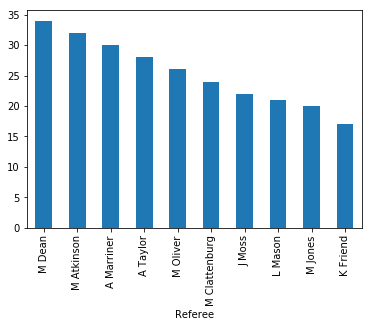

In [549]:
allseasonsArsenal.groupby(['Referee']).size().nlargest(10).plot(kind='bar')

### Check the result type: W for Win , D for draw and L for Loss

In [550]:
def check_results(row):
    result = ""
    res = row['FTR']
    team1 = row['HomeTeam']
    team2 = row['AwayTeam']
    if (team1 == 'Arsenal') & (res == 'H'):
        result = 'W'
    elif (team1 == 'Arsenal') & (res == 'A'):
        result = 'L'
    elif (team2 == 'Arsenal') & (res == 'A'):
        result = 'W'
    elif (team2 == 'Arsenal') & (res == 'H'):
        result = 'L'
    else:
        result = 'D'       

    return result

### Function to assign points to the result: 1 Point for Draw/Tie, 0 Points for a loass and 3 points for a win

In [551]:
def check_points(row):
    points = 0
    result = row['Result']
    if result == 'D':
        points = 1
    elif result == 'W':
        points = 3
    else:
        points = 0    
    return points

### Determine the season the match was played based on the date interval. Season  starts in August and ends in May 

In [552]:
def check_season(row):
    season = ""
    date = row['Date']
    if (date >= pd.to_datetime('2009-08-15')) & (date <= pd.to_datetime('2010-05-21')):
        season += "09-10"
    elif (date >= pd.to_datetime('2010-08-10')) & (date <= pd.to_datetime('2011-05-23')):
        season += "10-11"
    elif (date >= pd.to_datetime('2011-08-13')) & (date <= pd.to_datetime('2012-05-23')):
        season += "11-12"
    elif (date >= pd.to_datetime("2012-08-18")) & (date <= pd.to_datetime("2013-05-19")): 
        season += "12-13" 
    elif (date >= pd.to_datetime("2013-08-17")) & (date <= pd.to_datetime("2014-05-11")): 
        season += "13-14" 
    elif (date >= pd.to_datetime("2014-08-16")) & (date <= pd.to_datetime("2015-05-24")): 
        season += "14-15" 
    elif (date >= pd.to_datetime("2015-08-08")) & (date <= pd.to_datetime("2016-05-15")): 
        season += "15-16" 
    elif (date >= pd.to_datetime("2016-08-13")) & (date <= pd.to_datetime("2017-05-21")): 
        season += "16-17" 
    elif (date >= pd.to_datetime("2017-08-11")) & (date <= pd.to_datetime("2018-05-13")):
        season += "17-18"
    elif (date >= pd.to_datetime("2018-08-05")) & (date <= pd.to_datetime("2019-05-20")):
        season += "18-19"
    else:
        season = season
    return season

### Create new columns for results, pints, season and progress(The Sum of points accrued per season)

In [555]:
allseasonsArsenal.loc[:, 'Result'] = allseasonsArsenal.apply(check_results, axis = 1)
allseasonsArsenal.loc[:, 'Points'] = allseasonsArsenal.apply(check_points, axis = 1)
allseasonsArsenal.loc[:, 'Season'] = allseasonsArsenal.apply(check_season, axis = 1)
allseasonsArsenal.loc[:, 'Progress'] = allseasonsArsenal.groupby('Season')['Points'].cumsum() 

### Function to calculate the results by the referee who officiated

In [556]:
def win_percent_by_referee(df):
    temp = pd.DataFrame({'count' : df.groupby( [ 'Referee', 'Results'] )['Referee'].size()}).reset_index()
    temp['count'].astype(int)
    temp['Percent'] = round(temp.groupby('Referee')['count'].transform(lambda x: x/sum(x) * 100))
    temp = pd.pivot_table(temp, values='Percent', index=['Referee'],columns=['Results'], aggfunc=np.sum)
    temp.columns = ['Draw%', 'Loss%', 'Win%']
    temp.fillna(0,inplace=True)
    print (str(len(df['Referee'].unique())) + " referees officiated matches in the " + 
           str(len(allseasonsArsenal['Season'].unique())) + " seasons")
    return temp

In [557]:
# Find win, draw, loss, goald for, goals against, goal difference and points by season
results = pd.DataFrame({'Count' : allseasonsArsenal.groupby(['Season', 'Result']).size()}).reset_index()
results = pd.pivot_table(results, values='Count', index=['Season'],columns=['Result'], aggfunc=np.sum)

In [558]:
# Calculate the total results against all teams per season
def results_by_team(df):
    away = df.groupby(['AwayTeam','HomeTeam','Result']).size().to_frame('size')
    away = pd.pivot_table(away, values='size', index=['HomeTeam'],columns=['Result'], aggfunc=np.sum)
    away.fillna(0,inplace=True)
    home = df.groupby(['HomeTeam','AwayTeam','Result']).size().to_frame('size')
    home = pd.pivot_table(home, values='size', index=['AwayTeam'],columns=['Result'], aggfunc=np.sum)
    home.fillna(0,inplace=True)
    temp = away.add(home, fill_value=0)
    temp['Win%'] = round((temp['W']/ temp.sum(axis = 1)) * 100, 1)
    temp.drop(['Arsenal'], inplace=True)
    print ("Arsenal played against " + str(len(allseasonsArsenal['HomeTeam'].unique())) + " teams in the " + 
       str(len(allseasonsArsenal['Season'].unique())) + " seasons")
    print ("Arsenal won "+str(allseasonsArsenal.groupby(['Result']).size().to_frame('size').loc['W'][0]) + " games, drew "
           + str(allseasonsArsenal.groupby(['Result']).size().to_frame('size').loc['D'][0])
           +" games and lost " + str(allseasonsArsenal.groupby(['Result']).size().to_frame('size').loc['L'][0])
           + " games in the " + str(len(allseasonsArsenal['Season'].unique())) + " seasons")
    return temp

In [585]:
# Extend results by team to break the results down into HomeWins and Away wins
def ex_results_by_team(df):
    away = df.groupby(['AwayTeam','HomeTeam','Result']).size().to_frame('size')
    away = pd.pivot_table(away, values='size', index=['HomeTeam'],columns=['Result'], aggfunc=np.sum)
    away.fillna(0,inplace=True)
    home = df.groupby(['HomeTeam','AwayTeam','Result']).size().to_frame('size')
    home = pd.pivot_table(home, values='size', index=['AwayTeam'],columns=['Result'], aggfunc=np.sum)
    home.fillna(0,inplace=True)
    home['W%'] = round((home['W']/ home.sum(axis = 1)) * 100, 1)
    away['W%'] = round((away['W']/ away.sum(axis=1)) * 100, 1)
    cols = ['D','L','W']
    home['Home Games'] = home[cols].sum(axis=1).astype(int)
    away['Away Games'] = away[cols].sum(axis=1).astype(int)
    home.columns = ["Home Draw","Home Loss","Home Win","HomeWinPct", "HomeGames"]
    away.columns = ["Away Draw","Away Loss","Away Win","AwayWinPct", "AwayGames"]
                    
    # Insert the stadium location(Coordinates) as two columns
    ars_combined = pd.concat([home, away] ,axis=1)
    # Merge with the stadia dataset
    ars_combined = ars_combined.join(stadia)
    return ars_combined

In [593]:
# Plot the win percentage as circle around the stadia
sam = ex_results_by_team(allseasonsArsenal)
#sam.reset_index(drop = True, inplace = True)
sam.reset_index(level=0, inplace=True)
# Scale win percentage 
sam['Scaled Away Win'] = sam["AwayWinPct"]/1.5
hover = HoverTool(tooltips=[("Club","@index"),("Stadium", "@Stadium"),("ArsenalWin%", "@AwayWinPct{1.1}"),("Games","@HomeGames") ])
p = figure(x_range=(-330000, -380000), y_range=(6500000, 7450000),
           x_axis_type="mercator", y_axis_type="mercator", tools=[hover, 'wheel_zoom','save','pan','box_zoom','reset'])
p.add_tile(get_provider(Vendors.CARTODBPOSITRON))
win_percent_cds = ColumnDataSource(sam)
p.circle(x = 'X_Coords',
         y = 'Y_Coords',
         source=win_percent_cds,
         size='Scaled Away Win',
         line_color="darkblue", 
         fill_color="darkblue",
         fill_alpha=0.05)
   
output_notebook()
show(p)

Loading BokehJS ...

### Select Away Games and Home Games

In [120]:
allseasonsAway = allseasonsArsenal[allseasonsArsenal['AwayTeam'] == 'Arsenal']
allseasonsHome = allseasonsArsenal[allseasonsArsenal['HomeTeam'] == 'Arsenal']

### Goals conceded home and away by season

In [121]:
allseasonsHome.loc[:, 'HomeConceeded'] = allseasonsHome.groupby('Season')['FTAG'].cumsum() 
homeGoalsConceeded = allseasonsHome.groupby(['Season'])['HomeConceeded'].tail(1)
allseasonsAway.loc[:, 'AwayConceeded'] = allseasonsAway.groupby('Season')['FTHG'].cumsum() 
awayGoalsConceeded = allseasonsAway.groupby(['Season'])['AwayConceeded'].tail(1)

### Goals scored away and  at home by season.

In [122]:
allseasonsAway.loc[:, 'AwayScored'] = allseasonsAway.groupby('Season')['FTAG'].cumsum() 
awayGoalsScored = allseasonsAway.groupby(['Season'])['AwayScored'].tail(1)
allseasonsHome.loc[:, 'HomeScored'] = allseasonsHome.groupby('Season')['FTHG'].cumsum()
homeGoalsScored = allseasonsHome.groupby(['Season'])['HomeScored'].tail(1)

In [123]:
# Points amassed by season
arsenalPoints = allseasonsArsenal.groupby(['Season'])['Progress'].tail(1)

In [124]:
positions = ['3rd','4th','3rd','4th','4th','3rd','2nd','5th','6th','5th']

In [126]:
# Summary dataframe for Totteham Hotspurs
spurs = allseasons[(allseasons['AwayTeam'] == 'Arsenal') | (allseasons['HomeTeam'] == 'Arsenal')]
spurs.loc[:, 'Result'] = spurs.apply(check_results, axis = 1)
spurs.loc[:, 'Points'] = spurs.apply(check_points, axis = 1)
spurs.loc[:, 'Season'] = spurs.apply(check_season, axis = 1)
spurs.loc[:, 'Progress'] = spurs.groupby('Season')['Points'].cumsum() 
spurs_points = allseasonsArsenal.groupby(['Season'])['Progress'].tail(1)
spurs_positions = ['4th','5th','4th','5th', '6th','5th' ,'3rd','2nd','3rd','4th']
spurs_combined= pd.concat([pd.Series(spurs['Season'].unique()),arsenalPoints.reset_index(drop = True),
                          pd.Series(spurs_positions)] ,axis=1)
spurs_combined.columns = ['Season','Points', 'Position']

### Combine the extract series and group by results into a single dataframe

In [127]:
arsenal_combined= pd.concat([pd.Series(allseasonsArsenal['Season'].unique()),
                           homeGoalsScored.reset_index(drop = True) + awayGoalsScored.reset_index(drop = True),
                           homeGoalsConceeded.reset_index(drop = True) + awayGoalsConceeded.reset_index(drop = True),
                           arsenalPoints.reset_index(drop = True),pd.Series(positions),
                           spurs_combined['Points'], spurs_combined['Position']] ,axis=1)
arsenal_combined.columns = ['Season','For','Against','Points', 'Position', 'SpursPoints','SpursPosition']
arsenal_combined

,Season,For,Against,Points,Position,SpursPoints,SpursPosition
0,09-10,83,41,75,3rd,75,4th
1,10-11,72,43,68,4th,68,5th
2,11-12,74,49,70,3rd,70,4th
3,12-13,72,37,73,4th,73,5th
4,13-14,68,41,79,4th,79,6th
5,14-15,71,36,75,3rd,75,5th
6,15-16,65,36,71,2nd,71,3rd
7,16-17,77,44,75,5th,75,2nd
8,17-18,74,51,63,6th,63,3rd
9,18-19,73,51,70,5th,70,4th


### Create a ColumnDataSource for Points, HomeGoals, AwayGoals, HomeConceeded, AwayConceeded

In [ ]:
arsenal_combined_cds = ColumnDataSource(arsenal_combined)
results_team_cds = ColumnDataSource(results_by_team(allseasonsArsenal))
results_referee_cds = ColumnDataSource(win_percent_by_referee(allseasonsArsenal))
spurs_cds = ColumnDataSource(spurs_combined)

### Create and configure the figure

In [ ]:
goals_fig = figure(x_range = arsenal_combined_cds.data['Season'],plot_height=300, plot_width=500,
             title='Arsenal in the EPL',
             x_axis_label='Season', y_axis_label='Goals',
             toolbar_location=None)

goals_fig.line('Season', 'For', 
         color='#CE1141', legend='Scored', 
         source=seasonsCombined_cds)
goals_fig.line('Season', 'Against', 
         color='#006BB6', legend='Conceeded', 
         source=seasonsCombined_cds)

# Move the legend to the upper left corner
goals_fig.legend.location = 'top_right'

#Implement hide on click
goals_fig.legend.click_policy="hide"

In [ ]:
points_fig = figure(x_range = arsenal_combined_cds.data['Season'],plot_height=300, plot_width=500,
             title='Arsenal vs Totteham in the EPL',x_axis_label='Season', y_axis_label='Points',
             toolbar_location=None)
tooltips = [('TotalPoints','@Points'),('FinalPosition', '@Position')]
points_fig.line('Season', 'Points', color='#CE1141', legend='Arsenal', 
               source=arsenal_combined_cds)                               
#points_fig.add_tools(HoverTool(renderers=[r1], tooltips=tooltips))

points_fig.line('Season', 'SpursPoints', color='#006BB6', legend='Spurs', 
              source=arsenal_combined_cds)
#points_fig.add_tools(HoverTool(renderers=[r2], tooltips=tooltips))

# Move the legend to the upper left corner
points_fig.legend.location = 'top_right'

#Implement hide on click
points_fig.legend.click_policy="hide"

### Setup HTML page to display the chart 

In [ ]:
# Output to file
output_file('EPL Season 2009-2019.html', 
            title="Let's See")

#Increase the plot widths
points_fig.plot_width = 800

# Create two panels, one for each conference
goals_panel = Panel(child=goals_fig, title='Goals by Season')
#points_panel = Panel(child=points_fig, title='Points by Season')
# = Panel(child=results_fig, title='Results by Team')

# Assign the panels to Tabs
tabs = Tabs(tabs=[goals_panel])

# Show the tabbed layout
#show(tabs)